In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/MyDrive/Youtube_data.csv'

Mounted at /content/drive
/content/drive/MyDrive/Youtube_data.csv


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Youtube_data.csv')
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,3,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,4,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1


In [ ]:
df = df.drop(['Unnamed: 0', 'COMMENT_ID', 'AUTHOR', 'DATE'], axis=1)

In [ ]:
df.head(3)

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1


In [ ]:
df.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [ ]:
df['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

In [ ]:
inputs = df['CONTENT']
target = df['CLASS']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.15, random_state=42, stratify=target)

In [ ]:
y_train.value_counts(normalize=True)

1    0.513546
0    0.486454
Name: CLASS, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

1    0.513605
0    0.486395
Name: CLASS, dtype: float64

In [ ]:
print(f"x_train shape befor vectorizeing:{x_train.shape}")
print(f"x_test shape befor vectorizeing:{x_test.shape}")

x_train shape befor vectorizeing:(1661,)
x_test shape befor vectorizeing:(294,)


In [ ]:
vectorizer = CountVectorizer()
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [ ]:
print(f"x_train shape after vectorizeing:{x_train_transf.shape}")
print(f"x_test shape after vectorizeing:{x_test_transf.shape}")

x_train shape after vectorizeing:(1661, 4069)
x_test shape after vectorizeing:(294, 4069)


In [ ]:
clf = MultinomialNB()

In [ ]:
clf.fit(x_train_transf, y_train)

MultinomialNB()

In [ ]:
y_pred = clf.predict(x_test_transf)

In [ ]:
conf_matrix = confusion_matrix(y_pred, y_test)

In [ ]:
conf_matrix

array([[120,   6],
       [ 23, 145]])

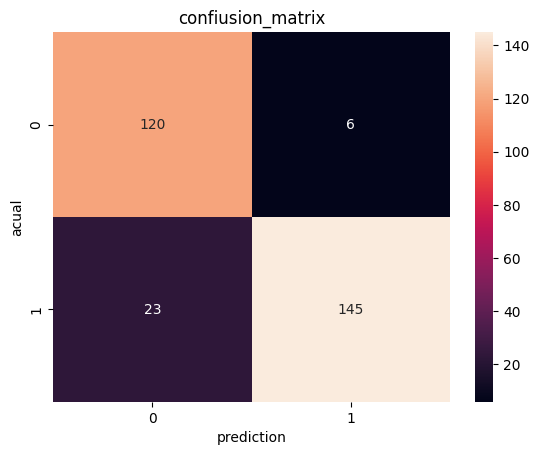

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt="g")
plt.xlabel('prediction')
plt.ylabel('acual')
plt.title('confiusion_matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Ham', 'spam']))

              precision    recall  f1-score   support

         Ham       0.95      0.84      0.89       143
        spam       0.86      0.96      0.91       151

    accuracy                           0.90       294
   macro avg       0.91      0.90      0.90       294
weighted avg       0.91      0.90      0.90       294

